In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Print the full df, no output cutoff
pd.set_option('display.max_rows', None)

df = pd.read_csv('outputs/accuracy_matrices/controlgroup.csv', index_col=0)
df

,Number,Type,Injury,Ambulance,Firetruck,Police,Vehicles,Fire,Weather
Trial,,,,,,,,,
1,0,1,1,1,1,0,0,1,1
2,0,1,1,0,1,1,1,1,1
3,0,1,1,1,1,1,1,0,1
4,0,1,1,1,1,1,0,1,0
5,0,1,1,1,1,1,0,1,0
6,0,1,1,1,1,1,0,1,0
7,0,1,1,1,1,1,0,1,1
8,0,1,1,1,1,1,0,1,1
9,0,1,0,0,1,1,0,1,1


In [68]:
# Get number of 1's from each column
print("Accuracy (out of 100) per question: \n")
print(df.sum(axis=0))
print()
print(f"Average: {df.sum(axis=0).mean():.3f}")

Accuracy (out of 100) per question: 

Number        0
Type         51
Injury       69
Ambulance    69
Firetruck    78
Police       80
Vehicles     30
Fire         79
Weather      62
dtype: int64

Average: 57.556


C:\Users\ryana\AppData\Local\Temp\ipykernel_9224\2343370811.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in enumerate(df.drop(columns=['Number']).sum(axis=0).iteritems()):


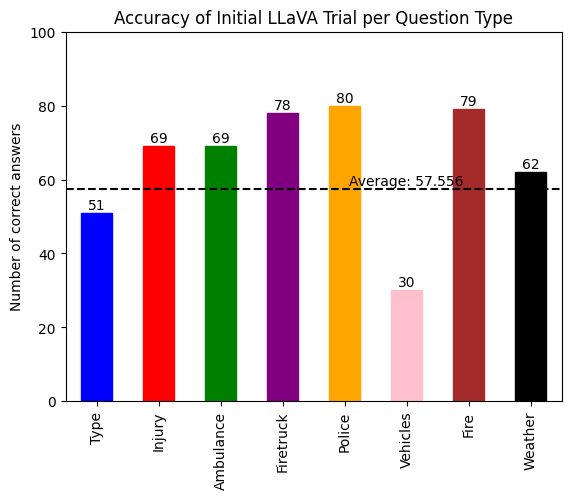

In [69]:
# Make a bar graph of the accuracy per question
df.drop(columns=['Number']).sum(axis=0).plot(kind='bar', title='Accuracy of Initial LLaVA Trial per Question Type', ylabel='Number of correct answers')

#Draw a line at the average, label it above the line
plt.axhline(y=df.sum(axis=0).mean(), color='black', linestyle='--')

#Add labels to the bars
for i, v in enumerate(df.drop(columns=['Number']).sum(axis=0).iteritems()):
    plt.text(i, v[1] + 1, str(v[1]), color='black', ha='center')

#Add label to the average line
plt.text(5, df.sum(axis=0).mean() + 1, f"Average: {df.sum(axis=0).mean():.3f}", color='black', ha='center')

plt.ylim(0, 100)
#Add different colors to the bars
colors = ['blue', 'red', 'green', 'purple', 'orange', 'pink', 'brown', 'black', 'yellow', 'gray']
for i, bar in enumerate(plt.gca().patches):
    bar.set_color(colors[i])

#Plot


#Save the graph, don't have cutoff
plt.savefig('outputs/images/accuracy_per_question_type.png', bbox_inches='tight')

In [70]:
#Sort the rows by number of 1's in the row
df['sum'] = df.sum(axis=1)
df = df.sort_values('sum', ascending=False)
df.drop('sum', axis=1, inplace=True)
print("Matrix sorted by best trials: \n")
print(df)

Matrix sorted by best trials: 

       Number  Type  Injury  Ambulance  Firetruck  Police  Vehicles  Fire  \
Trial                                                                       
23          0     1       1          1          1       1         1     1   
36          0     1       1          1          1       1         1     1   
15          0     1       1          1          1       1         1     1   
58          0     1       1          1          1       1         1     1   
45          0     1       1          1          1       1         0     1   
24          0     1       1          1          1       1         0     1   
73          0     0       1          1          1       1         1     1   
46          0     0       1          1          1       1         1     1   
68          0     0       1          1          1       1         1     1   
28          0     1       1          1          1       1         0     1   
29          0     0       1          1      